In [44]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
df = pd.read_csv("./data/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.shape

(891, 12)

In [47]:
df.isna().sum(axis = 0)/len(df) 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [48]:
df = df.drop(["Cabin"], axis = 1)

In [49]:
df = df[df["Age"].notna()]

In [50]:
df.shape

(714, 11)

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [52]:
vars_disc = ['Survived', 'Pclass','Sex', 'SibSp', 'Parch',   'Embarked']

# Cuales son ordinales y cuales son categoricas
for i in vars_disc:
    print(df[i].value_counts())
    


0    424
1    290
Name: Survived, dtype: int64
3    355
1    186
2    173
Name: Pclass, dtype: int64
male      453
female    261
Name: Sex, dtype: int64
0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    554
C    130
Q     28
Name: Embarked, dtype: int64


In [53]:
# VAribales categoricas
vars_cat = ["Pclass", "Sex", "Embarked"]

# One hot encoding
def one_hot(df):
    
    for i in vars_cat:
        categorias = df[i].value_counts().index
        print(categorias)

        for k in categorias:
            name = "is-" + str(i) + "-" + str(k)
            print(name)
            df[name] = np.where(df[i] == k, 1, 0)
            
        df = df.drop([i], axis=1)
        
    return df
        
df = one_hot(df)

Int64Index([3, 1, 2], dtype='int64')
is-Pclass-3
is-Pclass-1
is-Pclass-2
Index(['male', 'female'], dtype='object')
is-Sex-male
is-Sex-female
Index(['S', 'C', 'Q'], dtype='object')
is-Embarked-S
is-Embarked-C
is-Embarked-Q


In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q'],
      dtype='object')

In [55]:
#Outliers

In [56]:
df["family_size"] = df["SibSp"] + df["Parch"]
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,is-Pclass-3,is-Pclass-1,is-Pclass-2,is-Sex-male,is-Sex-female,is-Embarked-S,is-Embarked-C,is-Embarked-Q,family_size
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,0,1,1,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1,0,1,0,0,0


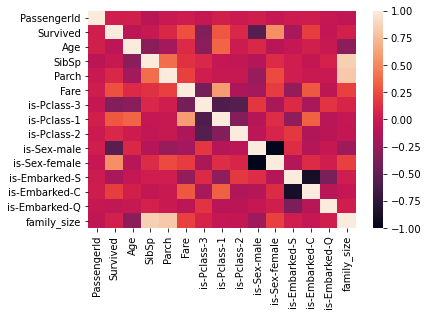

In [57]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)
# Cuando con OHE se puede deducir 1 entonces tenemos que quedarnos con n-1 porque se puede deducir
# Esto puede generar multicolinariedad

In [58]:
df = df.drop(['is-Pclass-3','is-Sex-male', 'is-Embarked-S', 'is-Embarked-C'], axis=1)

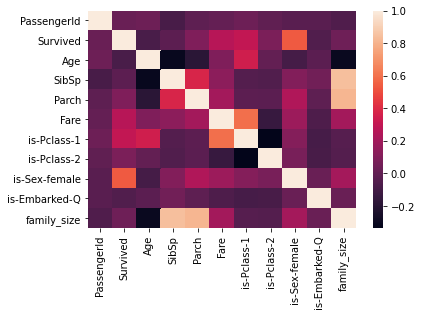

In [59]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)

In [60]:
df.shape

(714, 13)

In [61]:
vars_num = ["Fare", "Age"]
for i in vars_num:
    all_stats = df[i].describe()
    Q1 = all_stats["25%"]
    Q3 = all_stats["75%"]
    RI = Q3 - Q1
    lim_inf = Q1 - 1.5*RI
    lim_sup = Q3 + 1.5*RI
    
    df[i] = df[i].apply(lambda x: None if (x > lim_sup or x < lim_inf) else x)
    
    if df[i].isnull().values.any() == True:
        df[i] = df[i].dropna()

In [62]:
df.shape

(714, 13)

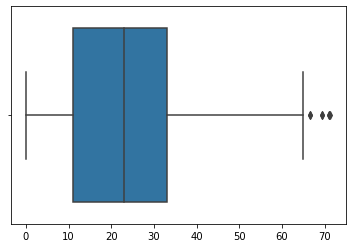

In [63]:
sns.boxplot(df[["Fare", "Age"]])

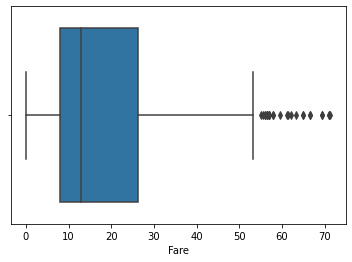

In [64]:
ax = sns.boxplot(x=df["Fare"])
ax

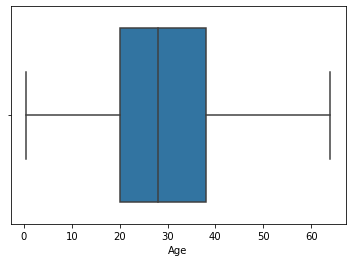

In [65]:
ax = sns.boxplot(x=df["Age"])
ax

In [90]:
df = df.dropna()
y = df["Survived"]
X = df.drop(["Name","Survived",'PassengerId', 'Survived', 'Ticket'], axis=1)
df.shape

(609, 13)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.15, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [94]:
clf = [
    (LogisticRegression(),"reg-log"),
    (DecisionTreeClassifier(), "arbol-class")
]

In [95]:
import joblib

for model, name in clf:
    
    #Entrenar
    model.fit(X_train, y_train)
    
    #Medir
    y_pred = model.predict(X_test)    
    accuracy = accuracy_score(y_test, y_pred)
    print(name," - Resultado:", round(accuracy,3)*100, "%")
    'PassengerId', 'Survived', 'Pclass',
    #Guardar
    job_file = "modelo-" + str(name) + ".pkl"
    joblib.dump(model, job_file)

reg-log  - Resultado: 75.0 %
arbol-class  - Resultado: 65.2 %
